## Hypothesis testing

In [128]:
# Libraries:

import pandas as pd
import numpy as np

import scipy.stats as st
from scipy.stats import bernoulli, binom, geom, poisson, uniform, expon, norm

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt


In [129]:
#birds_nolight = pd.read_csv("birds_collusions.csv")

birds = pd.read_csv("birds_light_score.csv")

In [130]:
birds.head()
#birds.info()

,common name,Scientific name,order,family,Genus,Species,date,day,month,year,Location,habitat,food,nesting,behavior,conservation,url,Light_Score
0,Nelson's Sparrow,Ammodramus nelsoni,Passeriformes,Passerellidae,Ammodramus,nelsoni,13/09/2000,13,9,2000,Chicago,Marshes,Insects,Ground,Ground Forager,Low Concern,https://www.allaboutbirds.org/guide/Nelsons_Sp...,16
1,Hermit Thrush,Catharus guttatus,Passeriformes,Turdidae,Catharus,guttatus,13/09/2000,13,9,2000,Chicago,Open Woodlands,Insects,Ground,Ground Forager,Low Concern,https://www.allaboutbirds.org/guide/Hermit_Thr...,16
2,Gray-cheeked Thrush,Catharus minimus,Passeriformes,Turdidae,Catharus,minimus,13/09/2000,13,9,2000,Chicago,Forests,Insects,Shrub,Ground Forager,Low Concern,https://www.allaboutbirds.org/guide/Gray-cheek...,16
3,Gray-cheeked Thrush,Catharus minimus,Passeriformes,Turdidae,Catharus,minimus,13/09/2000,13,9,2000,Chicago,Forests,Insects,Shrub,Ground Forager,Low Concern,https://www.allaboutbirds.org/guide/Gray-cheek...,16
4,Swainson's Thrush,Catharus ustulatus,Passeriformes,Turdidae,Catharus,ustulatus,13/09/2000,13,9,2000,Chicago,Forests,Insects,Shrub,Foliage Gleaner,Low Concern,https://www.allaboutbirds.org/guide/Swainsons_...,16


In [ ]:
# # Changing dates from intergers to strings:

# birds["day"] = birds["day"].astype("str")
# birds["month"] = birds["month"].astype("str")
# birds["year"] = birds["year"].astype("str")
# birds.head()


In [131]:
birds.shape

(40889, 18)

### Lightscore vs habitat

In [189]:
birds.pivot_table(index = ["habitat"], values = ["Scientific name"], aggfunc = ["count"])

,count
,Scientific name
habitat,
Forests,30399
Grasslands,151
Marshes,2096
Open Woodlands,5328
Rivers and Streams,7
Scrub,2908


In [190]:
## Comparing habitat vs. light_score:

#birds["habitat"].unique()

birds[birds["habitat"]=="Marshes"]["Light_Score"]
birds[birds["habitat"]=="Open Woodlands"]["Light_Score"]
birds[birds["habitat"]=="Forests"]["Light_Score"]
birds[birds["habitat"]=="Scrub"]["Light_Score"]
birds[birds["habitat"]=="Grasslands"]["Light_Score"]
#birds[birds["habitat"]=="Rivers and Streams"]["Light_Score"]
#birds[birds["habitat"]=="Lakes and Ponds"]["Light_Score"]

st.f_oneway(birds[birds["habitat"]=="Marshes"]["Light_Score"],birds[birds["habitat"]=="Open Woodlands"]["Light_Score"],birds[birds["habitat"]=="Forests"]["Light_Score"],birds[birds["habitat"]=="Scrub"]["Light_Score"],birds[birds["habitat"]=="Grasslands"]["Light_Score"])

F_onewayResult(statistic=4.592606641061587, pvalue=0.0010461713183213303)

In [191]:
# removing grasslands

st.f_oneway(birds[birds["habitat"]=="Marshes"]["Light_Score"],birds[birds["habitat"]=="Open Woodlands"]["Light_Score"],birds[birds["habitat"]=="Forests"]["Light_Score"],birds[birds["habitat"]=="Scrub"]["Light_Score"])

F_onewayResult(statistic=2.5191842831016578, pvalue=0.05611321595850265)

### Lightscore vs Behavior

In [137]:
birds.pivot_table(index = ["behavior"], values = ["Scientific name"], aggfunc = ["count"])

,count
,Scientific name
behavior,
Bark Forager,3202
Flycatching,228
Foliage Gleaner,11432
Ground Forager,26027


In [207]:
## Comparing behavior vs. light_score:

#birds["habitat"].unique()

birds[birds["behavior"]=="Bark Forager"]["Light_Score"]
birds[birds["behavior"]=="Foliage Gleaner"]["Light_Score"]
birds[birds["behavior"]=="Ground Forager"]["Light_Score"]
birds[birds["behavior"]=="Flycatching"]["Light_Score"]
#birds[birds["behavior"]=="Aerial Dive (water)"]["Light_Score"]


st.f_oneway(birds[birds["behavior"]=="Bark Forager"]["Light_Score"],birds[birds["behavior"]=="Foliage Gleaner"]["Light_Score"],birds[birds["behavior"]=="Ground Forager"]["Light_Score"],birds[birds["behavior"]=="Flycatching"]["Light_Score"])

F_onewayResult(statistic=58.012261729939, pvalue=2.053144731818039e-37)

In [208]:
#reomving flycatcher

st.f_oneway(birds[birds["behavior"]=="Bark Forager"]["Light_Score"],birds[birds["behavior"]=="Foliage Gleaner"]["Light_Score"],birds[birds["behavior"]=="Ground Forager"]["Light_Score"])

F_onewayResult(statistic=80.29687144213081, pvalue=1.571092903603299e-35)

In [209]:
# comparing Ground Forager vs Foliage Gleaner

st.ttest_ind(birds[birds["behavior"]=="Foliage Gleaner"]["Light_Score"],birds[birds["behavior"]=="Ground Forager"]["Light_Score"], equal_var = False)

Ttest_indResult(statistic=3.9308072287639484, pvalue=8.493281811275295e-05)

### Lightscore vs Species

In [141]:
birds.pivot_table(index = ["Scientific name"], values = ["habitat"], aggfunc = ["count"]).sort_values(by = ('count', 'habitat'), ascending = False)



,count
,habitat
Scientific name,
Zonotrichia albicollis,7721
Seiurus aurocapilla,3223
Junco hyemalis,2905
Certhia americana,2397
Catharus guttatus,2388
...,...
Setophaga citrina,2
Setophaga cerulea,2


In [ ]:
birds.pivot_table(index = ["year"], values = ["Scientific name"], aggfunc = {"Scientific name":"count"})

### Lightscore vs Family

In [142]:
birds.pivot_table(index = ["family"], values = ["Scientific name"], aggfunc = ["count"]).sort_values(by = ('count', 'Scientific name'), ascending = False)

,count
,Scientific name
family,
Passerellidae,17405
Parulidae,12684
Turdidae,5004
Certhiidae,2397
Regulidae,1215
Cardinalidae,564
Mimidae,476
Troglodytidae,474


In [210]:
## Comparing behavior vs. light_score:

#birds["habitat"].unique() - All from order Passeriformes

birds[birds["family"]=="Passerellidae"]["Light_Score"]
birds[birds["family"]=="Parulidae"]["Light_Score"]
birds[birds["family"]=="Turdidae"]["Light_Score"]
birds[birds["family"]=="Certhiidae"]["Light_Score"]
birds[birds["family"]=="Regulidae"]["Light_Score"]


st.f_oneway(birds[birds["family"]=="Passerellidae"]["Light_Score"],birds[birds["family"]=="Parulidae"]["Light_Score"],birds[birds["family"]=="Turdidae"]["Light_Score"],birds[birds["family"]=="Certhiidae"]["Light_Score"],birds[birds["family"]=="Regulidae"]["Light_Score"])

F_onewayResult(statistic=78.90721804468194, pvalue=8.658163992787557e-67)

### Lightscore vs order

In [144]:
birds.pivot_table(index = ["order"], values = ["Scientific name"], aggfunc = ["count"])

,count
,Scientific name
order,
Passeriformes,40889


In [145]:
birds.pivot_table(index = ["order","family"], values = ["Scientific name"], aggfunc = ["count"]).sort_values(by = ('count', 'Scientific name'), ascending = False)

count
                            Scientific name
order         family                       
Passeriformes Passerellidae           17405
              Parulidae               12684
              Turdidae                 5004
              Certhiidae               2397
              Regulidae                1215
              Cardinalidae              564
              Mimidae                   476
              Troglodytidae             474
              Sittidae                  240
              Tyrannidae                228
              Vireonidae                133
              Icteridae                  61
              Icteriidae                  4
              Polioptilidae               4

### Regression

#### years vs. collisions

In [146]:
collisions_years = birds.pivot_table(index = ["year","Location"], values = ["Scientific name"], aggfunc = ["count"]).reset_index()
collisions_years

,year,Location,count
,,,Scientific name
0,2000,Chicago,1035
1,2001,Chicago,708
2,2002,Chicago,1254
3,2003,Chicago,845
4,2004,Chicago,1097
5,2005,Chicago,1566
6,2006,Chicago,2620
7,2007,Chicago,2349
8,2008,Chicago,3143


In [173]:
y = collisions_years[('count', 'Scientific name')]
x = collisions_years[["year"]]

model = LinearRegression()
result = model.fit(x,y)

regression_line = result.intercept_ + result.coef_[0] * x

result.score(x,y)

C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.6784390452054583

In [174]:
pred = result.predict(x)

#RMSE - root mean squared error:
np.sqrt(mean_squared_error(pred,y))

mean_squared_error(pred,y, squared = False) #by declaring the squared false it will return RMSE instead MSE

#on average the model misses the correct values by 1004

C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


605.2979647689265

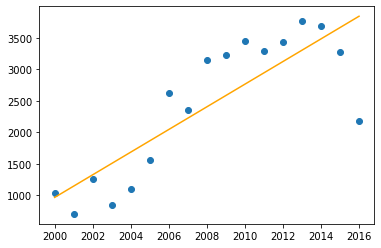

In [149]:
plt.plot(x,regression_line,c="orange")
plt.scatter(x,y)
plt.show()

In [154]:
#removing 2016

drop_2016 = collisions_years.iloc[:-1]
drop_2016

,year,Location,count
,,,Scientific name
0,2000,Chicago,1035
1,2001,Chicago,708
2,2002,Chicago,1254
3,2003,Chicago,845
4,2004,Chicago,1097
5,2005,Chicago,1566
6,2006,Chicago,2620
7,2007,Chicago,2349
8,2008,Chicago,3143


In [175]:
y = drop_2016[('count', 'Scientific name')]
x = drop_2016[["year"]]

model = LinearRegression()
result = model.fit(x,y)

regression_line = result.intercept_ + result.coef_[0] * x

result.score(x,y)

C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.8607287737633641

In [156]:
pred = result.predict(x)

#RMSE - root mean squared error:
np.sqrt(mean_squared_error(pred,y))

mean_squared_error(pred,y, squared = False) #by declaring the squared false it will return RMSE instead MSE

#on average the model misses the correct values by 1004

C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


410.01562806477455

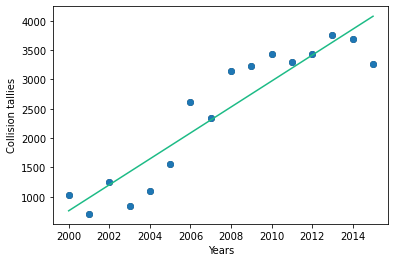

In [172]:
plt.scatter(x,y,color="#404040")
plt.xlabel('Years')
plt.ylabel('Collision tallies')
plt.plot(x,regression_line, c="#1DBB86")
plt.scatter(x,y)
plt.savefig("years.png")
plt.show()


#### years vs. lightscore

In [176]:
collisions_light = birds.pivot_table(index = ["Light_Score"], values = ["year"], aggfunc = ["count"]).reset_index()
collisions_light

,Light_Score,count
,,year
0,3,3047
1,4,6213
2,5,1192
3,6,2043
4,7,1142
5,8,521
6,9,1283
7,10,1509
8,11,1132


In [183]:
y = collisions_light[('count', 'year')]
x = collisions_light[["Light_Score"]]

model = LinearRegression()
result = model.fit(x,y)

regression_line = result.intercept_ + result.coef_[0] * x

result.score(x,y)

C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.08659598414223901

In [184]:
pred = result.predict(x)

#RMSE - root mean squared error:
np.sqrt(mean_squared_error(pred,y))

mean_squared_error(pred,y, squared = False) #by declaring the squared false it will return RMSE instead MSE

#on average the model misses the correct values by 2081

C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


1988.9693634268965

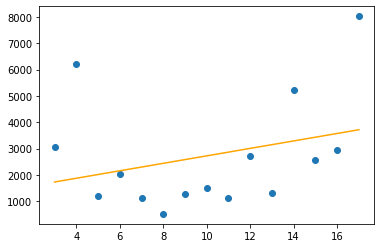

In [179]:
plt.plot(x,regression_line,c="orange")
plt.scatter(x,y)
plt.show()

### Logistic regression: collisions vs ecological factors

In [192]:
birds.head()

,common name,Scientific name,order,family,Genus,Species,date,day,month,year,Location,habitat,food,nesting,behavior,conservation,url,Light_Score
0,Nelson's Sparrow,Ammodramus nelsoni,Passeriformes,Passerellidae,Ammodramus,nelsoni,13/09/2000,13,9,2000,Chicago,Marshes,Insects,Ground,Ground Forager,Low Concern,https://www.allaboutbirds.org/guide/Nelsons_Sp...,16
1,Hermit Thrush,Catharus guttatus,Passeriformes,Turdidae,Catharus,guttatus,13/09/2000,13,9,2000,Chicago,Open Woodlands,Insects,Ground,Ground Forager,Low Concern,https://www.allaboutbirds.org/guide/Hermit_Thr...,16
2,Gray-cheeked Thrush,Catharus minimus,Passeriformes,Turdidae,Catharus,minimus,13/09/2000,13,9,2000,Chicago,Forests,Insects,Shrub,Ground Forager,Low Concern,https://www.allaboutbirds.org/guide/Gray-cheek...,16
3,Gray-cheeked Thrush,Catharus minimus,Passeriformes,Turdidae,Catharus,minimus,13/09/2000,13,9,2000,Chicago,Forests,Insects,Shrub,Ground Forager,Low Concern,https://www.allaboutbirds.org/guide/Gray-cheek...,16
4,Swainson's Thrush,Catharus ustulatus,Passeriformes,Turdidae,Catharus,ustulatus,13/09/2000,13,9,2000,Chicago,Forests,Insects,Shrub,Foliage Gleaner,Low Concern,https://www.allaboutbirds.org/guide/Swainsons_...,16


In [198]:
collisions_ecology = birds.pivot_table(index = ["Light_Score"], values = ["habitat", "food","nesting","behavior"], aggfunc = ["count"]).reset_index()
collisions_ecology

Light_Score    count                      
               behavior  food habitat nesting
0            3     3047  3047    3047    3047
1            4     6213  6213    6213    6213
2            5     1192  1192    1192    1192
3            6     2043  2043    2043    2043
4            7     1142  1142    1142    1142
5            8      521   521     521     521
6            9     1283  1283    1283    1283
7           10     1509  1509    1509    1509
8           11     1132  1132    1132    1132
9           12     2705  2705    2705    2705
10          13     1331  1331    1331    1331
11          14     5229  5229    5229    5229
12          15     2552  2552    2552    2552
13          16     2962  2962    2962    2962
14          17     8028  8028    8028    8028

In [201]:
lights_month = birds.pivot_table(index = ["month"], values = ["Light_Score"], aggfunc = ["count"]).reset_index()
lights_month

,month,count
,,Light_Score
0,3,1265
1,4,3332
2,5,5771
3,8,1012
4,9,12162
5,10,15628
6,11,1719


In [199]:
## Comparing family vs. year:

#birds["family"].unique() - All from order Passeriformes

birds[birds["family"]=="Passerellidae"]["year"]
birds[birds["family"]=="Parulidae"]["year"]
birds[birds["family"]=="Turdidae"]["year"]
birds[birds["family"]=="Certhiidae"]["year"]
birds[birds["family"]=="Regulidae"]["year"]


st.f_oneway(birds[birds["family"]=="Passerellidae"]["year"],birds[birds["family"]=="Parulidae"]["year"],birds[birds["family"]=="Turdidae"]["year"],birds[birds["family"]=="Certhiidae"]["year"],birds[birds["family"]=="Regulidae"]["year"])

F_onewayResult(statistic=191.53705319206864, pvalue=6.828557821806046e-163)